# Predicting German Election - Analysis and Transformation

In [1]:
#import libraries

import pyreadr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.dates import DateFormatter
import matplotlib.dates as mdates

In [2]:
#load data

polls = pd.read_csv("polls_btw.csv", index_col='date', parse_dates=True)
polls.head()

,election,sample_size,institute,party,support,election_date,days_to_election
date,,,,,,,
1951-04-15,1953.0,NaN,allensbach,oth,24.0,1953-09-06,875.0
1950-11-15,1953.0,NaN,allensbach,gru,NaN,1953-09-06,1026.0
1952-12-15,1953.0,NaN,allensbach,spd,35.0,1953-09-06,265.0
1953-02-15,1953.0,NaN,allensbach,spd,33.0,1953-09-06,203.0
1951-03-15,1953.0,NaN,allensbach,gru,NaN,1953-09-06,906.0


### Exploratory Analysis

In [3]:
#Impute sample_size with 1000 for missing values

polls["sample_size"].fillna(1000, inplace=True)
polls.head()

,election,sample_size,institute,party,support,election_date,days_to_election
date,,,,,,,
1951-04-15,1953.0,1000.0,allensbach,oth,24.0,1953-09-06,875.0
1950-11-15,1953.0,1000.0,allensbach,gru,NaN,1953-09-06,1026.0
1952-12-15,1953.0,1000.0,allensbach,spd,35.0,1953-09-06,265.0
1953-02-15,1953.0,1000.0,allensbach,spd,33.0,1953-09-06,203.0
1951-03-15,1953.0,1000.0,allensbach,gru,NaN,1953-09-06,906.0


In [198]:
#transform date column to datetime format in pandas
#time_format = '%Y-%m-%d'

#polls['date'] =  pd.to_datetime(polls['date'], format= time_format)
#polls.set_index('date', inplace = True)

In [4]:
#see how many unique polling institutions there are

polls['institute'].unique()

array(['allensbach', 'fgruppe_wahlen', 'forsa', 'emnid',
       'infratest_dimap', 'gms', 'insa'], dtype=object)

In [5]:
#see how many unique parties there are in the polls

polls['party'].unique()

array(['oth', 'gru', 'spd', 'cdu', 'lin', 'fdp', 'afd'], dtype=object)

In [6]:
#create data frame with polls from each institutions in 2017 

election2017_allen = polls.loc[(polls['institute'] == 'allensbach') & (polls['election'] == 2017)]
election2017_insa = polls.loc[(polls['institute'] == 'insa') & (polls['election'] == 2017)]
election2017_forsa = polls.loc[(polls['institute'] == 'forsa') & (polls['election'] == 2017)]
election2017_emnid = polls.loc[(polls['institute'] == 'emnid') & (polls['election'] == 2017)]
election2017_gms = polls.loc[(polls['institute'] == 'gms') & (polls['election'] == 2017)]
election2017_infra = polls.loc[(polls['institute'] == 'infratest_dimap') & (polls['election'] == 2017)]
election2017_fgruppe = polls.loc[(polls['institute'] == 'fgruppe_wahlen') & (polls['election'] == 2017)]

In [7]:
#check out institution allensbach: 

election2017_allen.head()

,election,sample_size,institute,party,support,election_date,days_to_election
date,,,,,,,
2015-06-18,2017.0,1400.0,allensbach,spd,26.0,2017-09-24,829.0
2016-08-24,2017.0,1496.0,allensbach,spd,23.0,2017-09-24,396.0
2015-08-19,2017.0,1400.0,allensbach,spd,26.0,2017-09-24,767.0
2015-02-19,2017.0,1400.0,allensbach,spd,25.5,2017-09-24,948.0
2017-07-18,2017.0,1403.0,allensbach,spd,25.0,2017-09-24,68.0


In [8]:
type(election2017_allen)

pandas.core.frame.DataFrame

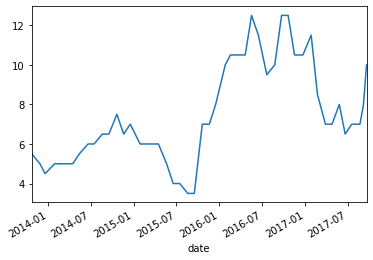

<Figure size 432x288 with 0 Axes>

In [10]:
#create allensbach's polls for AFD in 2017 election:

election2017_allen_afd = election2017_allen.loc[election2017_allen['party'] == 'afd']
#plot_allen_afd = sns.lineplot(x="days_to_election", y="support", data=election2017allen_afd)
election2017_allen_afd.support['2013-10-23':'2017-09-19'].plot()
plt.show()
plt.clf()

In [11]:
#resample the data by date 

upsampled_election2017_allen_afd = election2017_allen_afd['support'].resample('D').first()

In [12]:
#interpolate the data with linear method

interpolated_election2017_allen_afd = upsampled_election2017_allen_afd.interpolate(how='linear')
interpolated_election2017_allen_afd.head()

date
2013-10-23    5.500000
2013-10-24    5.485714
2013-10-25    5.471429
2013-10-26    5.457143
2013-10-27    5.442857
Freq: D, Name: support, dtype: float64

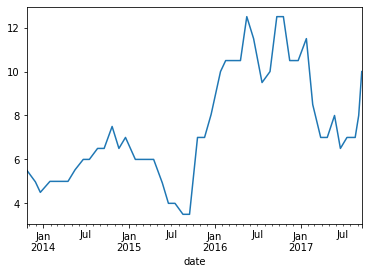

<Figure size 432x288 with 0 Axes>

In [13]:
#check the new data and see if the time-series still look the same

interpolated_election2017_allen_afd.plot()
plt.show()
plt.clf()

## Data transformation of time-series 

### AFD

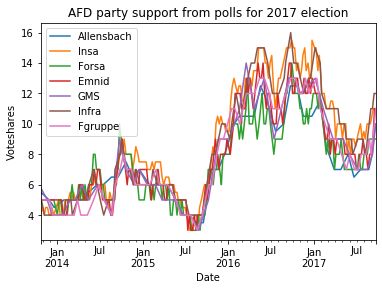

<Figure size 432x288 with 0 Axes>

In [14]:
#Create dataframe for AFD voteshares polls by each of the 7 institutions

election2017_allen_afd = election2017_allen.loc[election2017_allen['party'] == 'afd']
election2017_insa_afd = election2017_insa.loc[election2017_insa['party'] == 'afd']
election2017_forsa_afd = election2017_forsa.loc[election2017_forsa['party'] == 'afd']
election2017_emnid_afd = election2017_emnid.loc[election2017_emnid['party'] == 'afd']
election2017_gms_afd = election2017_gms.loc[election2017_gms['party'] == 'afd']
election2017_infra_afd = election2017_infra.loc[election2017_infra['party'] == 'afd']
election2017_fgruppe_afd = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'afd']

#Create upsampled and interpolated data for Allen in AFD voteshares

t_index_final = pd.date_range(start='2013-10-23', end='2017-09-21', freq='D')
t_index_allen = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_allen_afd = election2017_allen_afd['support'].resample('D').first().reindex(t_index_allen)
interpolated_election2017_allen_afd = upsampled_election2017_allen_afd.interpolate(how='linear')
interpolated_election2017_allen_afd = interpolated_election2017_allen_afd.reindex(t_index_final)

#Create upsampled and interpolated data for Insa in AFD voteshares

t_index_insa = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_insa_afd = election2017_insa_afd['support'].resample('D').first().reindex(t_index_insa)
interpolated_election2017_insa_afd = upsampled_election2017_insa_afd.interpolate(how='linear')
interpolated_election2017_insa_afd = interpolated_election2017_insa_afd.reindex(t_index_final)

#Create upsampled and interpolated data for Forsa in AFD voteshares

t_index_forsa = pd.date_range(start='2013-10-01', end='2017-09-21', freq='D')

upsampled_election2017_forsa_afd = election2017_forsa_afd['support'].resample('D').first().reindex(t_index_forsa)
interpolated_election2017_forsa_afd = upsampled_election2017_forsa_afd.interpolate(how='linear')
interpolated_election2017_forsa_afd = interpolated_election2017_forsa_afd.reindex(t_index_final)
interpolated_election2017_forsa_afd.tail()

#Create upsampled and interpolated data for Emnid in AFD voteshares

t_index_emnid = pd.date_range(start='2013-09-29', end='2017-09-21', freq='D')

upsampled_election2017_emnid_afd = election2017_emnid_afd['support'].resample('D').first().reindex(t_index_emnid)
interpolated_election2017_emnid_afd = upsampled_election2017_emnid_afd.interpolate(how='linear')
interpolated_election2017_emnid_afd = interpolated_election2017_emnid_afd.reindex(t_index_final)
interpolated_election2017_emnid_afd.tail()

#Create upsampled and interpolated data for GMS in AFD voteshares

t_index_gms = pd.date_range(start='2013-10-15', end='2017-09-21', freq='D')

upsampled_election2017_gms_afd = election2017_gms_afd['support'].resample('D').first().reindex(t_index_gms)
interpolated_election2017_gms_afd = upsampled_election2017_gms_afd.interpolate(how='linear')
interpolated_election2017_gms_afd = interpolated_election2017_gms_afd.reindex(t_index_final)
interpolated_election2017_gms_afd.tail()

#Create upsampled and interpolated data for Infra in AFD voteshares

t_index_infra = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_infra_afd = election2017_infra_afd['support'].resample('D').first().reindex(t_index_infra)
interpolated_election2017_infra_afd = upsampled_election2017_infra_afd.interpolate(how='linear')
interpolated_election2017_infra_afd = interpolated_election2017_infra_afd.reindex(t_index_final)
interpolated_election2017_gms_afd.tail()

#Create upsampled and interpolated data for Fgruppe in AFD voteshares

t_index_fgruppe = pd.date_range(start='2013-09-27', end='2017-09-21', freq='D')

upsampled_election2017_fgruppe_afd = election2017_fgruppe_afd['support'].resample('D').first().reindex(t_index_fgruppe)
interpolated_election2017_fgruppe_afd = upsampled_election2017_fgruppe_afd.interpolate(how='linear')
interpolated_election2017_fgruppe_afd = interpolated_election2017_fgruppe_afd.reindex(t_index_final)
interpolated_election2017_fgruppe_afd.tail()

# Plot out party support shares for AFD through polls of all institutions

interpolated_election2017_allen_afd.plot(label="Allensbach", legend = True)
interpolated_election2017_insa_afd.plot(label="Insa", legend = True)
interpolated_election2017_forsa_afd.plot(label="Forsa", legend = True)
interpolated_election2017_emnid_afd.plot(label="Emnid", legend = True)
interpolated_election2017_gms_afd.plot(label="GMS", legend = True)
interpolated_election2017_infra_afd.plot(label="Infra", legend = True)
interpolated_election2017_fgruppe_afd.plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("AFD party support from polls for 2017 election")
plt.show()
plt.clf()

### Other Parties

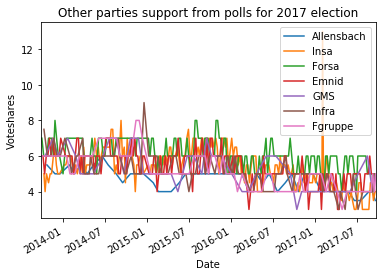

<Figure size 432x288 with 0 Axes>

In [15]:
# Plot party support for Other parties with different polling stations 

election2017_allen_oth = election2017_allen.loc[election2017_allen['party'] == 'oth']
election2017_insa_oth = election2017_insa.loc[election2017_insa['party'] == 'oth']
election2017_forsa_oth = election2017_forsa.loc[election2017_forsa['party'] == 'oth']
election2017_emnid_oth = election2017_emnid.loc[election2017_emnid['party'] == 'oth']
election2017_gms_oth = election2017_gms.loc[election2017_gms['party'] == 'oth']
election2017_infra_oth = election2017_infra.loc[election2017_infra['party'] == 'oth']
election2017_fgruppe_oth = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'oth']

election2017_allen_oth['support'].plot(label="Allensbach", legend = True)
election2017_insa_oth['support'].plot(label="Insa", legend = True)
election2017_forsa_oth['support'].plot(label="Forsa", legend = True)
election2017_emnid_oth['support'].plot(label="Emnid", legend = True)
election2017_gms_oth['support'].plot(label="GMS", legend = True)
election2017_infra_oth['support'].plot(label="Infra", legend = True)
election2017_fgruppe_oth['support'].plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("Other parties support from polls for 2017 election")
plt.show()
plt.clf()

### Green Party

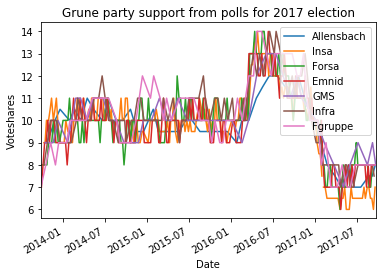

<Figure size 432x288 with 0 Axes>

In [17]:
election2017_allen_gru = election2017_allen.loc[election2017_allen['party'] == 'gru']
election2017_insa_gru = election2017_insa.loc[election2017_insa['party'] == 'gru']
election2017_forsa_gru = election2017_forsa.loc[election2017_forsa['party'] == 'gru']
election2017_emnid_gru = election2017_emnid.loc[election2017_emnid['party'] == 'gru']
election2017_gms_gru = election2017_gms.loc[election2017_gms['party'] == 'gru']
election2017_infra_gru = election2017_infra.loc[election2017_infra['party'] == 'gru']
election2017_fgruppe_gru = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'gru']

election2017_allen_gru['support'].plot(label="Allensbach", legend = True)
election2017_insa_gru['support'].plot(label="Insa", legend = True)
election2017_forsa_gru['support'].plot(label="Forsa", legend = True)
election2017_emnid_gru['support'].plot(label="Emnid", legend = True)
election2017_gms_gru['support'].plot(label="GMS", legend = True)
election2017_infra_gru['support'].plot(label="Infra", legend = True)
election2017_fgruppe_gru['support'].plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("Grune party support from polls for 2017 election")
plt.show()
plt.clf()

### SPD 

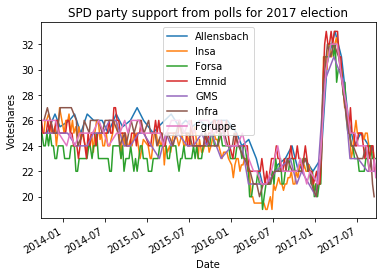

<Figure size 432x288 with 0 Axes>

In [19]:
election2017_allen_spd = election2017_allen.loc[election2017_allen['party'] == 'spd']
election2017_insa_spd = election2017_insa.loc[election2017_insa['party'] == 'spd']
election2017_forsa_spd = election2017_forsa.loc[election2017_forsa['party'] == 'spd']
election2017_emnid_spd = election2017_emnid.loc[election2017_emnid['party'] == 'spd']
election2017_gms_spd = election2017_gms.loc[election2017_gms['party'] == 'spd']
election2017_infra_spd = election2017_infra.loc[election2017_infra['party'] == 'spd']
election2017_fgruppe_spd = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'spd']

election2017_allen_spd['support'].plot(label="Allensbach", legend = True)
election2017_insa_spd['support'].plot(label="Insa", legend = True)
election2017_forsa_spd['support'].plot(label="Forsa", legend = True)
election2017_emnid_spd['support'].plot(label="Emnid", legend = True)
election2017_gms_spd['support'].plot(label="GMS", legend = True)
election2017_infra_spd['support'].plot(label="Infra", legend = True)
election2017_fgruppe_spd['support'].plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("SPD party support from polls for 2017 election")
plt.show()
plt.clf()

### CDU

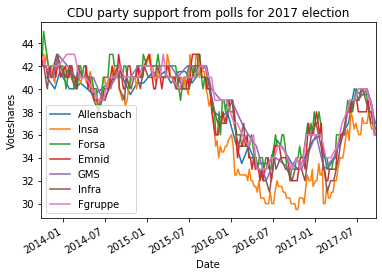

<Figure size 432x288 with 0 Axes>

In [20]:
election2017_allen_cdu = election2017_allen.loc[election2017_allen['party'] == 'cdu']
election2017_insa_cdu = election2017_insa.loc[election2017_insa['party'] == 'cdu']
election2017_forsa_cdu = election2017_forsa.loc[election2017_forsa['party'] == 'cdu']
election2017_emnid_cdu = election2017_emnid.loc[election2017_emnid['party'] == 'cdu']
election2017_gms_cdu = election2017_gms.loc[election2017_gms['party'] == 'cdu']
election2017_infra_cdu = election2017_infra.loc[election2017_infra['party'] == 'cdu']
election2017_fgruppe_cdu = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'cdu']

election2017_allen_cdu['support'].plot(label="Allensbach", legend = True)
election2017_insa_cdu['support'].plot(label="Insa", legend = True)
election2017_forsa_cdu['support'].plot(label="Forsa", legend = True)
election2017_emnid_cdu['support'].plot(label="Emnid", legend = True)
election2017_gms_cdu['support'].plot(label="GMS", legend = True)
election2017_infra_cdu['support'].plot(label="Infra", legend = True)
election2017_fgruppe_cdu['support'].plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("CDU party support from polls for 2017 election")
plt.show()
plt.clf()

### Die Linke

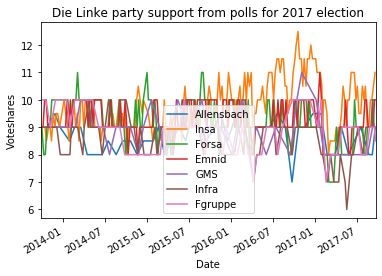

<Figure size 432x288 with 0 Axes>

In [21]:
election2017_allen_lin = election2017_allen.loc[election2017_allen['party'] == 'lin']
election2017_insa_lin = election2017_insa.loc[election2017_insa['party'] == 'lin']
election2017_forsa_lin = election2017_forsa.loc[election2017_forsa['party'] == 'lin']
election2017_emnid_lin = election2017_emnid.loc[election2017_emnid['party'] == 'lin']
election2017_gms_lin = election2017_gms.loc[election2017_gms['party'] == 'lin']
election2017_infra_lin = election2017_infra.loc[election2017_infra['party'] == 'lin']
election2017_fgruppe_lin = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'lin']

election2017_allen_lin['support'].plot(label="Allensbach", legend = True)
election2017_insa_lin['support'].plot(label="Insa", legend = True)
election2017_forsa_lin['support'].plot(label="Forsa", legend = True)
election2017_emnid_lin['support'].plot(label="Emnid", legend = True)
election2017_gms_lin['support'].plot(label="GMS", legend = True)
election2017_infra_lin['support'].plot(label="Infra", legend = True)
election2017_fgruppe_lin['support'].plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("Die Linke party support from polls for 2017 election")
plt.show()
plt.clf()

### FDP

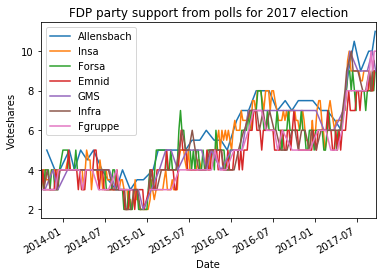

<Figure size 432x288 with 0 Axes>

In [22]:
election2017_allen_fdp = election2017_allen.loc[election2017_allen['party'] == 'fdp']
election2017_insa_fdp = election2017_insa.loc[election2017_insa['party'] == 'fdp']
election2017_forsa_fdp = election2017_forsa.loc[election2017_forsa['party'] == 'fdp']
election2017_emnid_fdp = election2017_emnid.loc[election2017_emnid['party'] == 'fdp']
election2017_gms_fdp = election2017_gms.loc[election2017_gms['party'] == 'fdp']
election2017_infra_fdp = election2017_infra.loc[election2017_infra['party'] == 'fdp']
election2017_fgruppe_fdp = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'fdp']

election2017_allen_fdp['support'].plot(label="Allensbach", legend = True)
election2017_insa_fdp['support'].plot(label="Insa", legend = True)
election2017_forsa_fdp['support'].plot(label="Forsa", legend = True)
election2017_emnid_fdp['support'].plot(label="Emnid", legend = True)
election2017_gms_fdp['support'].plot(label="GMS", legend = True)
election2017_infra_fdp['support'].plot(label="Infra", legend = True)
election2017_fgruppe_fdp['support'].plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("FDP party support from polls for 2017 election")
plt.show()
plt.clf()

### Create combined average data from different institutions

### AFD

In [23]:
# combine and take average of all 

df_2017_allen_afd_combined = interpolated_election2017_allen_afd.to_frame()
df_2017_insa_afd_combined = interpolated_election2017_insa_afd.to_frame()
df_2017_forsa_combined = interpolated_election2017_forsa_afd.to_frame()
df_2017_emnid_afd_combined = interpolated_election2017_emnid_afd.to_frame()
df_2017_gms_afd_combined = interpolated_election2017_gms_afd.to_frame()
df_2017_infra_afd_combined = interpolated_election2017_infra_afd.to_frame()
df_2017_fgruppe_afd_combined = interpolated_election2017_fgruppe_afd.to_frame()


In [24]:
combined_data_afd = pd.concat([df_2017_allen_afd_combined, df_2017_insa_afd_combined, df_2017_forsa_combined, 
                               df_2017_emnid_afd_combined, df_2017_gms_afd_combined, df_2017_infra_afd_combined, 
                               df_2017_fgruppe_afd_combined]).groupby(level=0).mean()

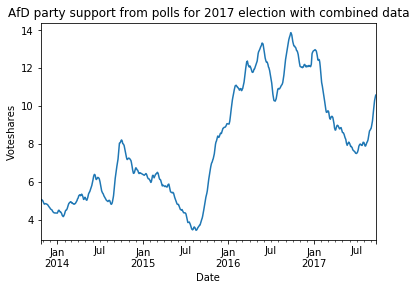

<Figure size 432x288 with 0 Axes>

In [25]:
#check out plot of the combined data

combined_data_afd['support'].plot()
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("AfD party support from polls for 2017 election with combined data")
plt.show()
plt.clf()

In [27]:
#store combined data in a separate csv for modeling

combined_data_afd.to_csv('combined_data_afd.csv')


### SPD

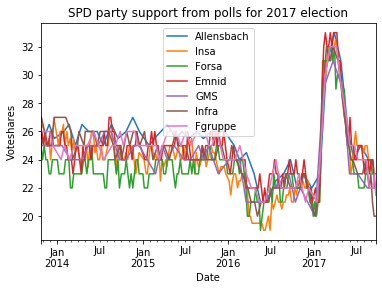

<Figure size 432x288 with 0 Axes>

In [28]:
# array(['oth', 'gru', 'spd', 'cdu', 'lin', 'fdp', 'afd'], dtype=object)


#Create dataframe for SPD voteshares polls by each of the 7 institutions

election2017_allen_spd = election2017_allen.loc[election2017_allen['party'] == 'spd']
election2017_insa_spd = election2017_insa.loc[election2017_insa['party'] == 'spd']
election2017_forsa_spd = election2017_forsa.loc[election2017_forsa['party'] == 'spd']
election2017_emnid_spd = election2017_emnid.loc[election2017_emnid['party'] == 'spd']
election2017_gms_spd = election2017_gms.loc[election2017_gms['party'] == 'spd']
election2017_infra_spd = election2017_infra.loc[election2017_infra['party'] == 'spd']
election2017_fgruppe_spd = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'spd']

#Create upsampled and interpolated data for Allen in SPD voteshares

t_index_final = pd.date_range(start='2013-10-23', end='2017-09-21', freq='D')
t_index_allen = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_allen_spd = election2017_allen_spd['support'].resample('D').first().reindex(t_index_allen)
interpolated_election2017_allen_spd = upsampled_election2017_allen_spd.interpolate(how='linear')
interpolated_election2017_allen_spd = interpolated_election2017_allen_spd.reindex(t_index_final)

#Create upsampled and interpolated data for Insa in SPD voteshares

t_index_insa = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_insa_spd = election2017_insa_spd['support'].resample('D').first().reindex(t_index_insa)
interpolated_election2017_insa_spd = upsampled_election2017_insa_spd.interpolate(how='linear')
interpolated_election2017_insa_spd = interpolated_election2017_insa_spd.reindex(t_index_final)

#Create upsampled and interpolated data for Forsa in SPD voteshares

t_index_forsa = pd.date_range(start='2013-10-01', end='2017-09-21', freq='D')

upsampled_election2017_forsa_spd = election2017_forsa_spd['support'].resample('D').first().reindex(t_index_forsa)
interpolated_election2017_forsa_spd = upsampled_election2017_forsa_spd.interpolate(how='linear')
interpolated_election2017_forsa_spd = interpolated_election2017_forsa_spd.reindex(t_index_final)

#Create upsampled and interpolated data for Emnid in SPD voteshares

t_index_emnid = pd.date_range(start='2013-09-29', end='2017-09-21', freq='D')

upsampled_election2017_emnid_spd = election2017_emnid_spd['support'].resample('D').first().reindex(t_index_emnid)
interpolated_election2017_emnid_spd = upsampled_election2017_emnid_spd.interpolate(how='linear')
interpolated_election2017_emnid_spd = interpolated_election2017_emnid_spd.reindex(t_index_final)

#Create upsampled and interpolated data for GMS in SPD voteshares

t_index_gms = pd.date_range(start='2013-10-15', end='2017-09-21', freq='D')

upsampled_election2017_gms_spd = election2017_gms_spd['support'].resample('D').first().reindex(t_index_gms)
interpolated_election2017_gms_spd = upsampled_election2017_gms_spd.interpolate(how='linear')
interpolated_election2017_gms_spd = interpolated_election2017_gms_spd.reindex(t_index_final)

#Create upsampled and interpolated data for Infra in SPD voteshares

t_index_infra = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_infra_spd = election2017_infra_spd['support'].resample('D').first().reindex(t_index_infra)
interpolated_election2017_infra_spd = upsampled_election2017_infra_spd.interpolate(how='linear')
interpolated_election2017_infra_spd = interpolated_election2017_infra_spd.reindex(t_index_final)

#Create upsampled and interpolated data for Fgruppe in SPD voteshares

t_index_fgruppe = pd.date_range(start='2013-09-27', end='2017-09-21', freq='D')

upsampled_election2017_fgruppe_spd = election2017_fgruppe_spd['support'].resample('D').first().reindex(t_index_fgruppe)
interpolated_election2017_fgruppe_spd = upsampled_election2017_fgruppe_spd.interpolate(how='linear')
interpolated_election2017_fgruppe_spd = interpolated_election2017_fgruppe_spd.reindex(t_index_final)

# Plot out party support shares for SPD through polls of all institutions

interpolated_election2017_allen_spd.plot(label="Allensbach", legend = True)
interpolated_election2017_insa_spd.plot(label="Insa", legend = True)
interpolated_election2017_forsa_spd.plot(label="Forsa", legend = True)
interpolated_election2017_emnid_spd.plot(label="Emnid", legend = True)
interpolated_election2017_gms_spd.plot(label="GMS", legend = True)
interpolated_election2017_infra_spd.plot(label="Infra", legend = True)
interpolated_election2017_fgruppe_spd.plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("SPD party support from polls for 2017 election")
plt.show()
plt.clf()

In [29]:
# Combined data for SPD

df_2017_allen_spd_combined = interpolated_election2017_allen_spd.to_frame()
df_2017_insa_spd_combined = interpolated_election2017_insa_spd.to_frame()
df_2017_forsa_spd_combined = interpolated_election2017_forsa_spd.to_frame()
df_2017_emnid_spd_combined = interpolated_election2017_emnid_spd.to_frame()
df_2017_gms_spd_combined = interpolated_election2017_gms_spd.to_frame()
df_2017_infra_spd_combined = interpolated_election2017_infra_spd.to_frame()
df_2017_fgruppe_spd_combined = interpolated_election2017_fgruppe_spd.to_frame()

# Concatenate all data for SPD together
combined_data_spd = pd.concat([df_2017_allen_spd_combined, df_2017_insa_spd_combined, df_2017_forsa_spd_combined, 
                               df_2017_emnid_spd_combined, df_2017_gms_spd_combined, df_2017_infra_spd_combined, 
                               df_2017_fgruppe_spd_combined]).groupby(level=0).mean()

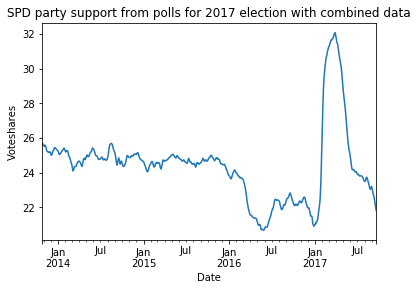

<Figure size 432x288 with 0 Axes>

In [30]:
# Plot combined data

combined_data_spd['support'].plot()
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("SPD party support from polls for 2017 election with combined data")
plt.show()
plt.clf()

In [31]:
#store combined data in a separate csv for modeling

combined_data_spd.to_csv('combined_data_spd.csv')


### CDU

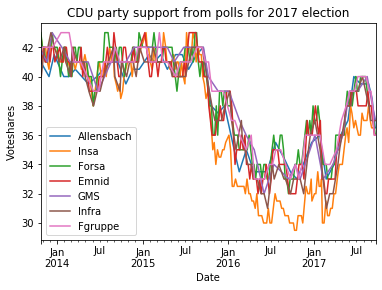

<Figure size 432x288 with 0 Axes>

In [32]:
# array(['oth', 'gru', 'spd', 'cdu', 'lin', 'fdp', 'afd'], dtype=object)


#Create dataframe for CDU voteshares polls by each of the 7 institutions

election2017_allen_cdu = election2017_allen.loc[election2017_allen['party'] == 'cdu']
election2017_insa_cdu = election2017_insa.loc[election2017_insa['party'] == 'cdu']
election2017_forsa_cdu = election2017_forsa.loc[election2017_forsa['party'] == 'cdu']
election2017_emnid_cdu = election2017_emnid.loc[election2017_emnid['party'] == 'cdu']
election2017_gms_cdu = election2017_gms.loc[election2017_gms['party'] == 'cdu']
election2017_infra_cdu = election2017_infra.loc[election2017_infra['party'] == 'cdu']
election2017_fgruppe_cdu = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'cdu']

#Create upsampled and interpolated data for Allen in CDU voteshares

t_index_final = pd.date_range(start='2013-10-23', end='2017-09-21', freq='D')
t_index_allen = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_allen_cdu = election2017_allen_cdu['support'].resample('D').first().reindex(t_index_allen)
interpolated_election2017_allen_cdu = upsampled_election2017_allen_cdu.interpolate(how='linear')
interpolated_election2017_allen_cdu = interpolated_election2017_allen_cdu.reindex(t_index_final)

#Create upsampled and interpolated data for Insa in CDU voteshares

t_index_insa = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_insa_cdu = election2017_insa_cdu['support'].resample('D').first().reindex(t_index_insa)
interpolated_election2017_insa_cdu = upsampled_election2017_insa_cdu.interpolate(how='linear')
interpolated_election2017_insa_cdu = interpolated_election2017_insa_cdu.reindex(t_index_final)

#Create upsampled and interpolated data for Forsa in AFD voteshares

t_index_forsa = pd.date_range(start='2013-10-01', end='2017-09-21', freq='D')

upsampled_election2017_forsa_cdu = election2017_forsa_cdu['support'].resample('D').first().reindex(t_index_forsa)
interpolated_election2017_forsa_cdu = upsampled_election2017_forsa_cdu.interpolate(how='linear')
interpolated_election2017_forsa_cdu = interpolated_election2017_forsa_cdu.reindex(t_index_final)

#Create upsampled and interpolated data for Emnid in AFD voteshares

t_index_emnid = pd.date_range(start='2013-09-29', end='2017-09-21', freq='D')

upsampled_election2017_emnid_cdu = election2017_emnid_cdu['support'].resample('D').first().reindex(t_index_emnid)
interpolated_election2017_emnid_cdu = upsampled_election2017_emnid_cdu.interpolate(how='linear')
interpolated_election2017_emnid_cdu = interpolated_election2017_emnid_cdu.reindex(t_index_final)

#Create upsampled and interpolated data for GMS in AFD voteshares

t_index_gms = pd.date_range(start='2013-10-15', end='2017-09-21', freq='D')

upsampled_election2017_gms_cdu = election2017_gms_cdu['support'].resample('D').first().reindex(t_index_gms)
interpolated_election2017_gms_cdu = upsampled_election2017_gms_cdu.interpolate(how='linear')
interpolated_election2017_gms_cdu = interpolated_election2017_gms_cdu.reindex(t_index_final)

#Create upsampled and interpolated data for Infra in AFD voteshares

t_index_infra = pd.date_range(start='2013-10-10', end='2017-09-21', freq='D')

upsampled_election2017_infra_cdu = election2017_infra_cdu['support'].resample('D').first().reindex(t_index_infra)
interpolated_election2017_infra_cdu = upsampled_election2017_infra_cdu.interpolate(how='linear')
interpolated_election2017_infra_cdu = interpolated_election2017_infra_cdu.reindex(t_index_final)

#Create upsampled and interpolated data for Fgruppe in AFD voteshares

t_index_fgruppe = pd.date_range(start='2013-09-27', end='2017-09-21', freq='D')

upsampled_election2017_fgruppe_cdu = election2017_fgruppe_cdu['support'].resample('D').first().reindex(t_index_fgruppe)
interpolated_election2017_fgruppe_cdu = upsampled_election2017_fgruppe_cdu.interpolate(how='linear')
interpolated_election2017_fgruppe_cdu = interpolated_election2017_fgruppe_cdu.reindex(t_index_final)

# Plot out party support shares for AFD through polls of all institutions

interpolated_election2017_allen_cdu.plot(label="Allensbach", legend = True)
interpolated_election2017_insa_cdu.plot(label="Insa", legend = True)
interpolated_election2017_forsa_cdu.plot(label="Forsa", legend = True)
interpolated_election2017_emnid_cdu.plot(label="Emnid", legend = True)
interpolated_election2017_gms_cdu.plot(label="GMS", legend = True)
interpolated_election2017_infra_cdu.plot(label="Infra", legend = True)
interpolated_election2017_fgruppe_cdu.plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("CDU party support from polls for 2017 election")
plt.show()
plt.clf()

In [33]:
# Combined data for SPD

df_2017_allen_cdu_combined = interpolated_election2017_allen_cdu.to_frame()
df_2017_insa_cdu_combined = interpolated_election2017_insa_cdu.to_frame()
df_2017_forsa_cdu_combined = interpolated_election2017_forsa_cdu.to_frame()
df_2017_emnid_cdu_combined = interpolated_election2017_emnid_cdu.to_frame()
df_2017_gms_cdu_combined = interpolated_election2017_gms_cdu.to_frame()
df_2017_infra_cdu_combined = interpolated_election2017_infra_cdu.to_frame()
df_2017_fgruppe_cdu_combined = interpolated_election2017_fgruppe_cdu.to_frame()

# Concatenate all data for SPD together
combined_data_cdu = pd.concat([df_2017_allen_cdu_combined, df_2017_insa_cdu_combined, df_2017_forsa_cdu_combined, 
                               df_2017_emnid_cdu_combined, df_2017_gms_cdu_combined, df_2017_infra_cdu_combined, 
                               df_2017_fgruppe_cdu_combined]).groupby(level=0).mean()

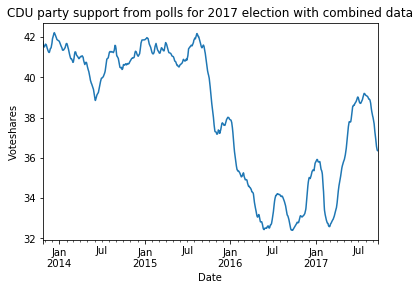

<Figure size 432x288 with 0 Axes>

In [34]:
# Plot combined data

combined_data_cdu['support'].plot()
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("CDU party support from polls for 2017 election with combined data")
plt.show()
plt.clf()

In [35]:
#store combined data in a separate csv for modeling

combined_data_cdu.to_csv('combined_data_cdu.csv')


### Green Party

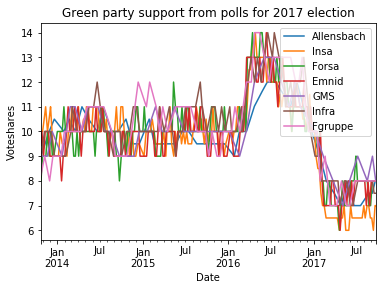

<Figure size 432x288 with 0 Axes>

In [36]:

#Create dataframe for Green voteshares polls by each of the 7 institutions

election2017_allen_gru = election2017_allen.loc[election2017_allen['party'] == 'gru']
election2017_insa_gru = election2017_insa.loc[election2017_insa['party'] == 'gru']
election2017_forsa_gru = election2017_forsa.loc[election2017_forsa['party'] == 'gru']
election2017_emnid_gru = election2017_emnid.loc[election2017_emnid['party'] == 'gru']
election2017_gms_gru = election2017_gms.loc[election2017_gms['party'] == 'gru']
election2017_infra_gru = election2017_infra.loc[election2017_infra['party'] == 'gru']
election2017_fgruppe_gru = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'gru']

#Create upsampled and interpolated data for Allen in Green voteshares

upsampled_election2017_allen_gru = election2017_allen_gru['support'].resample('D').first().reindex(t_index_allen)
interpolated_election2017_allen_gru = upsampled_election2017_allen_gru.interpolate(how='linear')
interpolated_election2017_allen_gru = interpolated_election2017_allen_gru.reindex(t_index_final)

#Create upsampled and interpolated data for Insa in Green voteshares

upsampled_election2017_insa_gru = election2017_insa_gru['support'].resample('D').first().reindex(t_index_insa)
interpolated_election2017_insa_gru = upsampled_election2017_insa_gru.interpolate(how='linear')
interpolated_election2017_insa_gru = interpolated_election2017_insa_gru.reindex(t_index_final)

#Create upsampled and interpolated data for Forsa in Green voteshares

upsampled_election2017_forsa_gru = election2017_forsa_gru['support'].resample('D').first().reindex(t_index_forsa)
interpolated_election2017_forsa_gru = upsampled_election2017_forsa_gru.interpolate(how='linear')
interpolated_election2017_forsa_gru = interpolated_election2017_forsa_gru.reindex(t_index_final)

#Create upsampled and interpolated data for Emnid in Green voteshares

upsampled_election2017_emnid_gru = election2017_emnid_gru['support'].resample('D').first().reindex(t_index_emnid)
interpolated_election2017_emnid_gru = upsampled_election2017_emnid_gru.interpolate(how='linear')
interpolated_election2017_emnid_gru = interpolated_election2017_emnid_gru.reindex(t_index_final)

#Create upsampled and interpolated data for GMS in Green voteshares

upsampled_election2017_gms_gru = election2017_gms_gru['support'].resample('D').first().reindex(t_index_gms)
interpolated_election2017_gms_gru = upsampled_election2017_gms_gru.interpolate(how='linear')
interpolated_election2017_gms_gru = interpolated_election2017_gms_gru.reindex(t_index_final)

#Create upsampled and interpolated data for Infra in Green voteshares

upsampled_election2017_infra_gru = election2017_infra_gru['support'].resample('D').first().reindex(t_index_infra)
interpolated_election2017_infra_gru = upsampled_election2017_infra_gru.interpolate(how='linear')
interpolated_election2017_infra_gru = interpolated_election2017_infra_gru.reindex(t_index_final)

#Create upsampled and interpolated data for Fgruppe in Green voteshares

upsampled_election2017_fgruppe_gru = election2017_fgruppe_gru['support'].resample('D').first().reindex(t_index_fgruppe)
interpolated_election2017_fgruppe_gru = upsampled_election2017_fgruppe_gru.interpolate(how='linear')
interpolated_election2017_fgruppe_gru = interpolated_election2017_fgruppe_gru.reindex(t_index_final)

# Plot out party support shares for Green through polls of all institutions

interpolated_election2017_allen_gru.plot(label="Allensbach", legend = True)
interpolated_election2017_insa_gru.plot(label="Insa", legend = True)
interpolated_election2017_forsa_gru.plot(label="Forsa", legend = True)
interpolated_election2017_emnid_gru.plot(label="Emnid", legend = True)
interpolated_election2017_gms_gru.plot(label="GMS", legend = True)
interpolated_election2017_infra_gru.plot(label="Infra", legend = True)
interpolated_election2017_fgruppe_gru.plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("Green party support from polls for 2017 election")
plt.show()
plt.clf()

In [37]:
# Combined data for Green Party

df_2017_allen_gru_combined = interpolated_election2017_allen_gru.to_frame()
df_2017_insa_gru_combined = interpolated_election2017_insa_gru.to_frame()
df_2017_forsa_gru_combined = interpolated_election2017_forsa_gru.to_frame()
df_2017_emnid_gru_combined = interpolated_election2017_emnid_gru.to_frame()
df_2017_gms_gru_combined = interpolated_election2017_gms_gru.to_frame()
df_2017_infra_gru_combined = interpolated_election2017_infra_gru.to_frame()
df_2017_fgruppe_gru_combined = interpolated_election2017_fgruppe_gru.to_frame()

# Concatenate all data for Green together
combined_data_gru = pd.concat([df_2017_allen_gru_combined, df_2017_insa_gru_combined, df_2017_forsa_gru_combined, 
                               df_2017_emnid_gru_combined, df_2017_gms_gru_combined, df_2017_infra_gru_combined, 
                               df_2017_fgruppe_gru_combined]).groupby(level=0).mean()

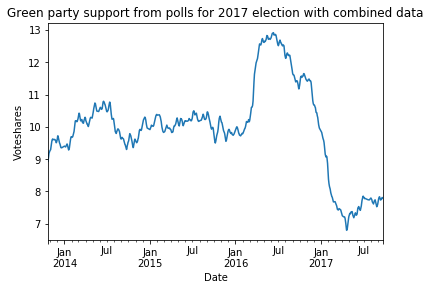

<Figure size 432x288 with 0 Axes>

In [38]:
# Plot combined data

combined_data_gru['support'].plot()
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("Green party support from polls for 2017 election with combined data")
plt.show()
plt.clf()

In [39]:
#store combined data in a separate csv for modeling

combined_data_gru.to_csv('combined_data_gru.csv')


### FDP

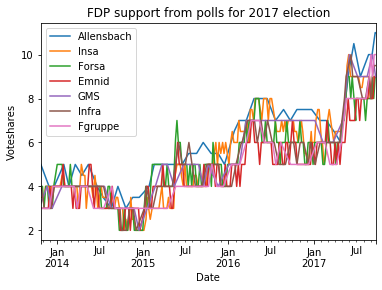

<Figure size 432x288 with 0 Axes>

In [40]:

#Create dataframe for FDP voteshares polls by each of the 7 institutions

election2017_allen_fdp = election2017_allen.loc[election2017_allen['party'] == 'fdp']
election2017_insa_fdp = election2017_insa.loc[election2017_insa['party'] == 'fdp']
election2017_forsa_fdp = election2017_forsa.loc[election2017_forsa['party'] == 'fdp']
election2017_emnid_fdp = election2017_emnid.loc[election2017_emnid['party'] == 'fdp']
election2017_gms_fdp = election2017_gms.loc[election2017_gms['party'] == 'fdp']
election2017_infra_fdp = election2017_infra.loc[election2017_infra['party'] == 'fdp']
election2017_fgruppe_fdp = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'fdp']

#Create upsampled and interpolated data for Allen in FDP voteshares

upsampled_election2017_allen_fdp = election2017_allen_fdp['support'].resample('D').first().reindex(t_index_allen)
interpolated_election2017_allen_fdp = upsampled_election2017_allen_fdp.interpolate(how='linear')
interpolated_election2017_allen_fdp = interpolated_election2017_allen_fdp.reindex(t_index_final)

#Create upsampled and interpolated data for Insa in FDP voteshares

upsampled_election2017_insa_fdp = election2017_insa_fdp['support'].resample('D').first().reindex(t_index_insa)
interpolated_election2017_insa_fdp = upsampled_election2017_insa_fdp.interpolate(how='linear')
interpolated_election2017_insa_fdp = interpolated_election2017_insa_fdp.reindex(t_index_final)

#Create upsampled and interpolated data for Forsa in FDP voteshares

upsampled_election2017_forsa_fdp = election2017_forsa_fdp['support'].resample('D').first().reindex(t_index_forsa)
interpolated_election2017_forsa_fdp = upsampled_election2017_forsa_fdp.interpolate(how='linear')
interpolated_election2017_forsa_fdp = interpolated_election2017_forsa_fdp.reindex(t_index_final)

#Create upsampled and interpolated data for Emnid in FDP voteshares

upsampled_election2017_emnid_fdp = election2017_emnid_fdp['support'].resample('D').first().reindex(t_index_emnid)
interpolated_election2017_emnid_fdp = upsampled_election2017_emnid_fdp.interpolate(how='linear')
interpolated_election2017_emnid_fdp = interpolated_election2017_emnid_fdp.reindex(t_index_final)

#Create upsampled and interpolated data for GMS in FDP voteshares

upsampled_election2017_gms_fdp = election2017_gms_fdp['support'].resample('D').first().reindex(t_index_gms)
interpolated_election2017_gms_fdp = upsampled_election2017_gms_fdp.interpolate(how='linear')
interpolated_election2017_gms_fdp = interpolated_election2017_gms_fdp.reindex(t_index_final)

#Create upsampled and interpolated data for Infra in FDP voteshares

upsampled_election2017_infra_fdp = election2017_infra_fdp['support'].resample('D').first().reindex(t_index_infra)
interpolated_election2017_infra_fdp = upsampled_election2017_infra_fdp.interpolate(how='linear')
interpolated_election2017_infra_fdp = interpolated_election2017_infra_fdp.reindex(t_index_final)

#Create upsampled and interpolated data for Fgruppe in FDP voteshares

upsampled_election2017_fgruppe_fdp = election2017_fgruppe_fdp['support'].resample('D').first().reindex(t_index_fgruppe)
interpolated_election2017_fgruppe_fdp = upsampled_election2017_fgruppe_fdp.interpolate(how='linear')
interpolated_election2017_fgruppe_fdp = interpolated_election2017_fgruppe_fdp.reindex(t_index_final)

# Plot out party support shares for FDP through polls of all institutions

interpolated_election2017_allen_fdp.plot(label="Allensbach", legend = True)
interpolated_election2017_insa_fdp.plot(label="Insa", legend = True)
interpolated_election2017_forsa_fdp.plot(label="Forsa", legend = True)
interpolated_election2017_emnid_fdp.plot(label="Emnid", legend = True)
interpolated_election2017_gms_fdp.plot(label="GMS", legend = True)
interpolated_election2017_infra_fdp.plot(label="Infra", legend = True)
interpolated_election2017_fgruppe_fdp.plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("FDP support from polls for 2017 election")
plt.show()
plt.clf()

In [41]:
# Combined data for FDP Party

df_2017_allen_fdp_combined = interpolated_election2017_allen_fdp.to_frame()
df_2017_insa_fdp_combined = interpolated_election2017_insa_fdp.to_frame()
df_2017_forsa_fdp_combined = interpolated_election2017_forsa_fdp.to_frame()
df_2017_emnid_fdp_combined = interpolated_election2017_emnid_fdp.to_frame()
df_2017_gms_fdp_combined = interpolated_election2017_gms_fdp.to_frame()
df_2017_infra_fdp_combined = interpolated_election2017_infra_fdp.to_frame()
df_2017_fgruppe_fdp_combined = interpolated_election2017_fgruppe_fdp.to_frame()

# Concatenate all data for Green together
combined_data_fdp = pd.concat([df_2017_allen_fdp_combined, df_2017_insa_fdp_combined, df_2017_forsa_fdp_combined, 
                               df_2017_emnid_fdp_combined, df_2017_gms_fdp_combined, df_2017_infra_fdp_combined, 
                               df_2017_fgruppe_fdp_combined]).groupby(level=0).mean()

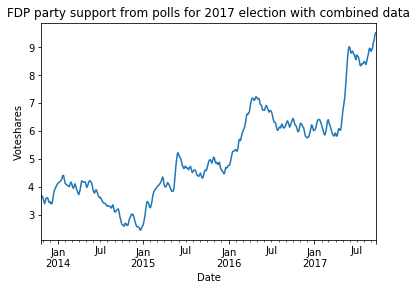

<Figure size 432x288 with 0 Axes>

In [42]:
# Plot combined data

combined_data_fdp['support'].plot()
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("FDP party support from polls for 2017 election with combined data")
plt.show()
plt.clf()

In [43]:
#store combined data in a separate csv for modeling

combined_data_fdp.to_csv('combined_data_fdp.csv')


### Die Linke


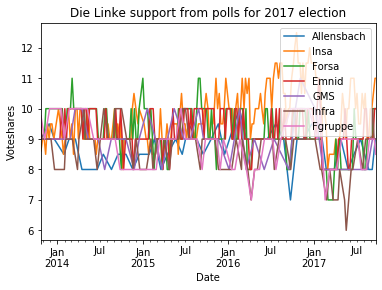

<Figure size 432x288 with 0 Axes>

In [44]:

#Create dataframe for Die Linke voteshares polls by each of the 7 institutions

election2017_allen_lin = election2017_allen.loc[election2017_allen['party'] == 'lin']
election2017_insa_lin = election2017_insa.loc[election2017_insa['party'] == 'lin']
election2017_forsa_lin = election2017_forsa.loc[election2017_forsa['party'] == 'lin']
election2017_emnid_lin = election2017_emnid.loc[election2017_emnid['party'] == 'lin']
election2017_gms_lin = election2017_gms.loc[election2017_gms['party'] == 'lin']
election2017_infra_lin = election2017_infra.loc[election2017_infra['party'] == 'lin']
election2017_fgruppe_lin = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'lin']

#Create upsampled and interpolated data for Allen in Die Linke voteshares

upsampled_election2017_allen_lin = election2017_allen_lin['support'].resample('D').first().reindex(t_index_allen)
interpolated_election2017_allen_lin = upsampled_election2017_allen_lin.interpolate(how='linear')
interpolated_election2017_allen_lin = interpolated_election2017_allen_lin.reindex(t_index_final)

#Create upsampled and interpolated data for Insa in Die Linke voteshares

upsampled_election2017_insa_lin = election2017_insa_lin['support'].resample('D').first().reindex(t_index_insa)
interpolated_election2017_insa_lin = upsampled_election2017_insa_lin.interpolate(how='linear')
interpolated_election2017_insa_lin = interpolated_election2017_insa_lin.reindex(t_index_final)

#Create upsampled and interpolated data for Forsa in Die Linke voteshares

upsampled_election2017_forsa_lin = election2017_forsa_lin['support'].resample('D').first().reindex(t_index_forsa)
interpolated_election2017_forsa_lin = upsampled_election2017_forsa_lin.interpolate(how='linear')
interpolated_election2017_forsa_lin = interpolated_election2017_forsa_lin.reindex(t_index_final)

#Create upsampled and interpolated data for Emnid in Die Linke voteshares

upsampled_election2017_emnid_lin = election2017_emnid_lin['support'].resample('D').first().reindex(t_index_emnid)
interpolated_election2017_emnid_lin = upsampled_election2017_emnid_lin.interpolate(how='linear')
interpolated_election2017_emnid_lin = interpolated_election2017_emnid_lin.reindex(t_index_final)

#Create upsampled and interpolated data for GMS in Die Linke voteshares

upsampled_election2017_gms_lin = election2017_gms_lin['support'].resample('D').first().reindex(t_index_gms)
interpolated_election2017_gms_lin = upsampled_election2017_gms_lin.interpolate(how='linear')
interpolated_election2017_gms_lin = interpolated_election2017_gms_lin.reindex(t_index_final)

#Create upsampled and interpolated data for Infra in Die Linke voteshares

upsampled_election2017_infra_lin = election2017_infra_lin['support'].resample('D').first().reindex(t_index_infra)
interpolated_election2017_infra_lin = upsampled_election2017_infra_lin.interpolate(how='linear')
interpolated_election2017_infra_lin = interpolated_election2017_infra_lin.reindex(t_index_final)

#Create upsampled and interpolated data for Fgruppe in Die Linke voteshares

upsampled_election2017_fgruppe_lin = election2017_fgruppe_lin['support'].resample('D').first().reindex(t_index_fgruppe)
interpolated_election2017_fgruppe_lin = upsampled_election2017_fgruppe_lin.interpolate(how='linear')
interpolated_election2017_fgruppe_lin = interpolated_election2017_fgruppe_lin.reindex(t_index_final)

# Plot out party support shares for Die Linke through polls of all institutions

interpolated_election2017_allen_lin.plot(label="Allensbach", legend = True)
interpolated_election2017_insa_lin.plot(label="Insa", legend = True)
interpolated_election2017_forsa_lin.plot(label="Forsa", legend = True)
interpolated_election2017_emnid_lin.plot(label="Emnid", legend = True)
interpolated_election2017_gms_lin.plot(label="GMS", legend = True)
interpolated_election2017_infra_lin.plot(label="Infra", legend = True)
interpolated_election2017_fgruppe_lin.plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("Die Linke support from polls for 2017 election")
plt.show()
plt.clf()

In [45]:
# Combined data for Die Linke Party

df_2017_allen_lin_combined = interpolated_election2017_allen_lin.to_frame()
df_2017_insa_lin_combined = interpolated_election2017_insa_lin.to_frame()
df_2017_forsa_lin_combined = interpolated_election2017_forsa_lin.to_frame()
df_2017_emnid_lin_combined = interpolated_election2017_emnid_lin.to_frame()
df_2017_gms_lin_combined = interpolated_election2017_gms_lin.to_frame()
df_2017_infra_lin_combined = interpolated_election2017_infra_lin.to_frame()
df_2017_fgruppe_lin_combined = interpolated_election2017_fgruppe_lin.to_frame()

# Concatenate all data for Die Linke together
combined_data_lin = pd.concat([df_2017_allen_lin_combined, df_2017_insa_lin_combined, df_2017_forsa_lin_combined, 
                               df_2017_emnid_lin_combined, df_2017_gms_lin_combined, df_2017_infra_lin_combined, 
                               df_2017_fgruppe_lin_combined]).groupby(level=0).mean()

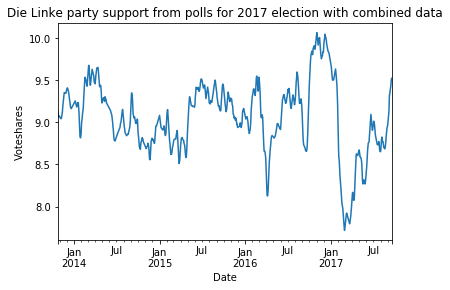

<Figure size 432x288 with 0 Axes>

In [46]:
# Plot combined data

combined_data_lin['support'].plot()
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("Die Linke party support from polls for 2017 election with combined data")
plt.show()
plt.clf()

In [47]:
#store combined data in a separate csv for modeling

combined_data_lin.to_csv('combined_data_lin.csv')


### Other Parties

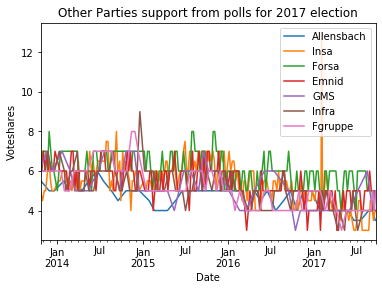

<Figure size 432x288 with 0 Axes>

In [48]:

#Create dataframe for Other Parties voteshares polls by each of the 7 institutions

election2017_allen_oth = election2017_allen.loc[election2017_allen['party'] == 'oth']
election2017_insa_oth = election2017_insa.loc[election2017_insa['party'] == 'oth']
election2017_forsa_oth = election2017_forsa.loc[election2017_forsa['party'] == 'oth']
election2017_emnid_oth = election2017_emnid.loc[election2017_emnid['party'] == 'oth']
election2017_gms_oth = election2017_gms.loc[election2017_gms['party'] == 'oth']
election2017_infra_oth = election2017_infra.loc[election2017_infra['party'] == 'oth']
election2017_fgruppe_oth = election2017_fgruppe.loc[election2017_fgruppe['party'] == 'oth']

#Create upsampled and interpolated data for Allen in Other Parties voteshares

upsampled_election2017_allen_oth = election2017_allen_oth['support'].resample('D').first().reindex(t_index_allen)
interpolated_election2017_allen_oth = upsampled_election2017_allen_oth.interpolate(how='linear')
interpolated_election2017_allen_oth = interpolated_election2017_allen_oth.reindex(t_index_final)

#Create upsampled and interpolated data for Insa in Other Parties voteshares

upsampled_election2017_insa_oth = election2017_insa_oth['support'].resample('D').first().reindex(t_index_insa)
interpolated_election2017_insa_oth = upsampled_election2017_insa_oth.interpolate(how='linear')
interpolated_election2017_insa_oth = interpolated_election2017_insa_oth.reindex(t_index_final)

#Create upsampled and interpolated data for Forsa in Other Parties voteshares

upsampled_election2017_forsa_oth = election2017_forsa_oth['support'].resample('D').first().reindex(t_index_forsa)
interpolated_election2017_forsa_oth = upsampled_election2017_forsa_oth.interpolate(how='linear')
interpolated_election2017_forsa_oth = interpolated_election2017_forsa_oth.reindex(t_index_final)

#Create upsampled and interpolated data for Emnid in Other Parties voteshares

upsampled_election2017_emnid_oth = election2017_emnid_oth['support'].resample('D').first().reindex(t_index_emnid)
interpolated_election2017_emnid_oth = upsampled_election2017_emnid_oth.interpolate(how='linear')
interpolated_election2017_emnid_oth = interpolated_election2017_emnid_oth.reindex(t_index_final)

#Create upsampled and interpolated data for GMS in Other Parties voteshares

upsampled_election2017_gms_oth = election2017_gms_oth['support'].resample('D').first().reindex(t_index_gms)
interpolated_election2017_gms_oth = upsampled_election2017_gms_oth.interpolate(how='linear')
interpolated_election2017_gms_oth = interpolated_election2017_gms_oth.reindex(t_index_final)

#Create upsampled and interpolated data for Infra in Other Parties voteshares

upsampled_election2017_infra_oth = election2017_infra_oth['support'].resample('D').first().reindex(t_index_infra)
interpolated_election2017_infra_oth = upsampled_election2017_infra_oth.interpolate(how='linear')
interpolated_election2017_infra_oth = interpolated_election2017_infra_oth.reindex(t_index_final)

#Create upsampled and interpolated data for Fgruppe in Other Parties voteshares

upsampled_election2017_fgruppe_oth = election2017_fgruppe_oth['support'].resample('D').first().reindex(t_index_fgruppe)
interpolated_election2017_fgruppe_oth = upsampled_election2017_fgruppe_oth.interpolate(how='linear')
interpolated_election2017_fgruppe_oth = interpolated_election2017_fgruppe_oth.reindex(t_index_final)

# Plot out party support shares for Other Parties through polls of all institutions

interpolated_election2017_allen_oth.plot(label="Allensbach", legend = True)
interpolated_election2017_insa_oth.plot(label="Insa", legend = True)
interpolated_election2017_forsa_oth.plot(label="Forsa", legend = True)
interpolated_election2017_emnid_oth.plot(label="Emnid", legend = True)
interpolated_election2017_gms_oth.plot(label="GMS", legend = True)
interpolated_election2017_infra_oth.plot(label="Infra", legend = True)
interpolated_election2017_fgruppe_oth.plot(label="Fgruppe", legend = True)
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("Other Parties support from polls for 2017 election")
plt.show()
plt.clf()

In [49]:
# Combined data for Other Parties

df_2017_allen_oth_combined = interpolated_election2017_allen_oth.to_frame()
df_2017_insa_oth_combined = interpolated_election2017_insa_oth.to_frame()
df_2017_forsa_oth_combined = interpolated_election2017_forsa_oth.to_frame()
df_2017_emnid_oth_combined = interpolated_election2017_emnid_oth.to_frame()
df_2017_gms_oth_combined = interpolated_election2017_gms_oth.to_frame()
df_2017_infra_oth_combined = interpolated_election2017_infra_oth.to_frame()
df_2017_fgruppe_oth_combined = interpolated_election2017_fgruppe_oth.to_frame()

# Concatenate all data for Other Parties together
combined_data_oth = pd.concat([df_2017_allen_oth_combined, df_2017_insa_oth_combined, df_2017_forsa_oth_combined, 
                               df_2017_emnid_oth_combined, df_2017_gms_oth_combined, df_2017_infra_oth_combined, 
                               df_2017_fgruppe_oth_combined]).groupby(level=0).mean()

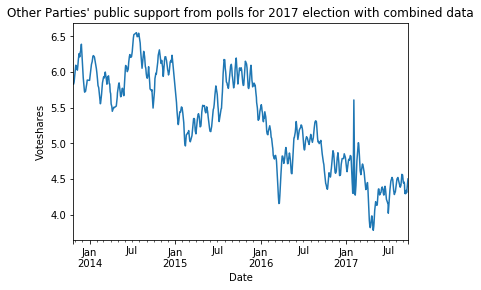

<Figure size 432x288 with 0 Axes>

In [50]:
# Plot combined data

combined_data_oth['support'].plot()
plt.xlabel("Date")
plt.ylabel("Voteshares")
plt.title("Other Parties' public support from polls for 2017 election with combined data")
plt.show()
plt.clf()

In [51]:
#store combined data in a separate csv for modeling

combined_data_oth.to_csv('combined_data_oth.csv')
